#The infamous O-ring

## Background

In 1986, the space shuttle Challenger exploded during take off, killing the seven astronauts aboard. It is believed that the explosion was caused by the failure of an O-ring (a rubber ring that seals parts of the solid fuel rockets together), and that the failure was caused by the cold weather at the time of launch (31F).

For a long time the failure of the O-ring was a very contentious and hotly debated topic, and it was not until the infamous court-room demonstration by Richard Feynman, who was able to tear apart an O-ring with his bare hands, that the failure due to cold weather was really taken seriously.

This afternoon, you are going to use real test data from NASA, along with your new Bayesian arsenal, to reach your own conclusion on what happened that fateful morning.

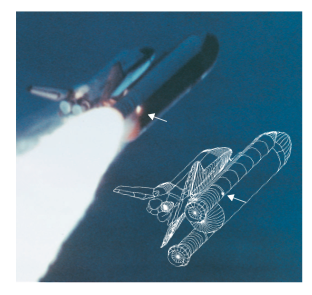

In [17]:
from IPython.display import Image
Image(filename='../data/shuttle.png')

## The data and assumptions

In the file <a href="../data/chall.txt">chall.txt</a>, you will find a table of temperature (in Fahrenheit) and failure data from 23 simulated shuttle launches, where 1 stands for O-ring failure and 0 no failure.  We assume that the observed temperatures are fixed and that, at temperature $t$, an O-ring fails with probability $f(\theta_{1}+\theta_{2}t)$ conditionally on $\Theta = (\theta_1, \theta_2)$.

Here, $f(z) = 1/(1 + \exp(-z))$ is the logistic function.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Question 1
Based on your own common sense knowledge, suggest a prior distribution for the regression parameters ($\theta_1, \theta_2$), and explain your choice of prior.

###Question 2
Write a script that draws 50,000 samples of $\theta_1$ and $\theta_2$ from the posterior distribution of $\Theta$ using a Metropolis sampler.

###Question 3
Compute a Bayesian posterior probability for an O-ring failure at $t = 31F$.

# Solution

In [3]:
"""
Begin by importing the basic libraries.
Here are a couple to get you started...
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

###Question 1 Solution
Your choice of priors should be based on previous (common sense) knowledge, but not <i>specifically</i> take into account the data. This does not necessarily mean that you can't at least look at the data to give you a handwavey vague notion of what you are dealing with.

So begin by reading in the data and plotting it:

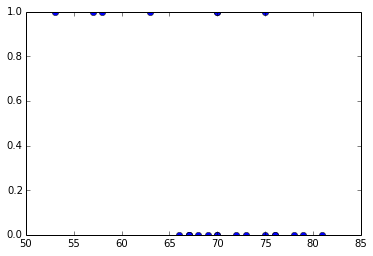

In [8]:
"""
Read in the data from chall.txt
Plot the data
"""

### Your code here ###

data = np.loadtxt("../data/chall.txt")
plt.plot(data[::,0],data[::,1],'o')



Next, you should define a new function, you could for instance call it "logit_func", and define the logistic function as outlined in the question. Play around with a few specific values for the regression parameters, and overplot them onto the data figure.

In [17]:
xdata = data[::,0]
ydata = data[::,1]

(0, 1.5)

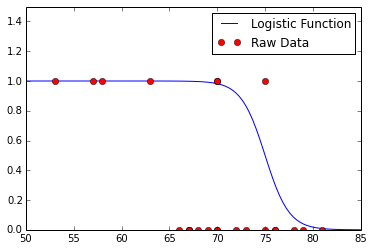

In [90]:
x =np.linspace(50,85,100)
# x =np.arange(-20,20)
z= 0.8*x-60
def logit_func(z):
    """
    Define the logistic function and it's input params
    """
    return 1./(1.+exp(z))
    
plt.plot(x,logit_func(z),'-',label="Logistic Function")
plt.plot(xdata,ydata,'o',color='r',label="Raw Data")
plt.legend(loc="best")
plt.ylim(0,1.5)
## Now overplot the logit_func onto your figure of the data



Now that you have some intuition towards the logistic function and how it relates to the data you've been given. Decide on your priors for the regression parameters, explain your choice of specific distribution and plot them

$z=\theta_{1}+\theta_{2}t$

In [68]:
"""
Explain your choice of priors
Plot the regression parameter priors
"""

def prior(c):
    if c>-50 or c<-85:
        return 1
    else:
        return -np.inf
def prior2(c):
    if c>-0.8 or c<-1:
        return 1
    else:
        return -np.inf

###Question 2 Solution

The first step to sampling from a posterior is to define the likelihood. Begin by sampling writing down the analytic form of the likelihood that will be used to define your posterior. 



[Hint: if a problem seems complicated, simplify it. Do you think this is a true or false statement?]

Next, define your function for the likelihood which should call your logit_func at some point:

In [93]:
def bernoulli(p,k):
    return p**k*(1-p)**(1-k)
for trial in data:
    ti = trial[0]
    pi =trial[1]
    print (ki,pi)
    z= theta1*ti-theta2
    p = logit_func(z)
    f = bernoulli(p,k)
    return f 

(66.0, 0.0)
(70.0, 1.0)
(69.0, 0.0)
(68.0, 0.0)
(67.0, 0.0)
(72.0, 0.0)
(73.0, 0.0)
(70.0, 0.0)
(57.0, 1.0)
(63.0, 1.0)
(70.0, 1.0)
(78.0, 0.0)
(67.0, 0.0)
(53.0, 1.0)
(67.0, 0.0)
(75.0, 0.0)
(70.0, 0.0)
(81.0, 0.0)
(76.0, 0.0)
(79.0, 0.0)
(75.0, 1.0)
(76.0, 0.0)
(58.0, 1.0)


In [91]:
from scipy.stats import bernoulli
def mylikelihood(foo1,foo2,etc):
    """
    Define the likelihood function and it's input params
    """
#     bernoulli.pm
    for i in data: 
    return out
def chisq(t,d,errs):
    # t is thetha (model)
    # d is data
    # returns the log of the chisquare
    a = np.sum((t-d)**2)
    loga= -0.5*a
    return loga

$$\newcommand{\var}{{\rm var}}
\newcommand{\cov}{{\rm cov}}
\newcommand{\corr}{{\rm corr}}
\newcommand{\xss}{x^{(i+1)}}
\newcommand{\xs}{x^{\star}}
\newcommand{\xt}{x^{(i)}}
\newcommand{\xa}{x_a}
\newcommand{\xb}{x_b}$$
Choose a step-proposal function, $q(\xs|\xt)$, and build your 2-d metropolis sampler. Remember the form that a general Metropolis-Hastings sampler takes. Here's the pseudocode...

* Initialize $x^{(1)}$ 
* For i=2 to N 

   * Sample $u\sim U(0,1)$ 
   *  Sample $\xs \sim q(\xs|x^{(i)})$ 
   *  if $u<A(x^{(i)},\xs) = \min\left[1, \frac{p(\xs) \, q(\xt|\xs)}{p(x^{(i)} q(\xs|\xt) } \right]  $
   
   $x^{(i+1)}=\xs$
   * else  
		$x^{(i+1)}=x^{(i)}$
   * Now do the y-step...

HINT:: remember to choose a proposal function $q(\xs|\xt)$ which is symmetric, so that you can drop the Hastings term and reduce the acceptance probability to

$$ A(x,\xs) = \min\left[1, \frac{p(\xs)}{p(x) } \right] $$
which was the original algorithm proposed by Metropolis, thus the Metropolis algorithm.


In [14]:
def mymetropolis(foo1,foo2,etc):
    """
    Define your metropolis function
    This will call your likelihood function and sample from the posterior (prior x likelihood)
    The inputs only need to be the number of sample draws you want (and maybe an option for the proposal step size) 
    Output should probably be a [N x 2] element array containing draws for theta_1, and theta_2
    """
    pass
    return out

Now implement mymetropolis and draw 50,000 samples. Plot these as a 2-D histogram or contour plot, so that you can visualize the sample distribution.

In [ ]:
## Impletement for Metropolis sampler here.

## And plot the histogram and/or contours of the samples







## Question 3: Solution
Here we are going to throw our draws back into our likelihood function, except we will set t=31 in the likelihood. And then we are going to plot the distribution of the probability outputs. This is the Bayesian posterior distribution.

In [15]:
## Draws from your sampler into the likelihood.

## Plot the histogram of the output

## How likely was an O-ring failure at 31F?







#BONUS ROUND: Question 4
The day before a new launch, meteorologists predict that the temperature will be $T \sim N(68, 1)$ during take-off. Estimate the probability for an O-ring failure during this take-off.

In [ ]:
"""
NO HINTS FOR THIS PART.
MWAHAHAHAHA ;-)
"""


# Your code here
